# Neuronales Netzwerk - W4_Konditorei
Baisert Basiert auf Kopie von neural_net_estimation_with_dropout.ipynb.

## Importing the Data

We will start by importing the data and taking a look at the first few rows.

In [409]:

# Import the necessary libraries
import pandas as pd
import requests
import io

# Define the file paths
subdirectory = "pickle_data//W4_Konditorei"
training_features_path = f"{subdirectory}/training_features.pkl"
validation_features_path = f"{subdirectory}/validation_features.pkl"
test_features_path = f"{subdirectory}/test_features.pkl"
training_labels_path = f"{subdirectory}/training_labels.pkl"
validation_labels_path = f"{subdirectory}/validation_labels.pkl"
test_labels_path = f"{subdirectory}/test_labels.pkl"

# Read the pickle files
training_features = pd.read_pickle(training_features_path)
validation_features = pd.read_pickle(validation_features_path)
test_features = pd.read_pickle(test_features_path)
training_labels = pd.read_pickle(training_labels_path)
validation_labels = pd.read_pickle(validation_labels_path)
test_labels = pd.read_pickle(test_labels_path)

# Verify the loaded data by printing their shapes and a few rows
print("Loaded Training features dimensions:", training_features.shape)
print("Loaded Validation features dimensions:", validation_features.shape)
print("Loaded Test features dimensions:", test_features.shape)
print()
print("Loaded Training labels dimensions:", training_labels.shape)
print("Loaded Validation labels dimensions:", validation_labels.shape)
print("Loaded Test labels dimensions:", test_labels.shape)
print()

print("First few rows of loaded training features:")
print(training_features.head())
print()
print("First few rows of loaded training labels:")
print(training_labels.head())


Loaded Training features dimensions: (1409, 16)
Loaded Validation features dimensions: (357, 16)
Loaded Test features dimensions: (364, 16)

Loaded Training labels dimensions: (1409, 1)
Loaded Validation labels dimensions: (357, 1)
Loaded Test labels dimensions: (364, 1)

First few rows of loaded training features:
   Inflationsrate  Heimspiel_1.0  Markt_1.0  Temperatur  Schulferien_1.0  \
0            1.53              0          0     17.8375                1   
1            1.53              0          0     17.3125                1   
2            1.53              0          0     21.0750                1   
3            1.53              0          0     18.8500                1   
4            1.53              0          0     19.9750                1   

   Sommer_1.0  Herbst_1.0  Saturday_1.0  KielerWoche_1.0  Feiertage_1.0  \
0           1           0             0                0              0   
1           1           0             0                0              0   
2

In [410]:
# Convert DataFrames to numpy arrays
training_features_array = training_features.to_numpy()
training_labels_array = training_labels.to_numpy().flatten()  # Flatten in case labels are a DataFrame with one column

print("Training Features Array:")
print(training_features_array[:5])

Training Features Array:
[[1.53000000e+00 0.00000000e+00 0.00000000e+00 1.78375000e+01
  1.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 3.00000000e-01 0.00000000e+00
  3.50877193e-01 0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.53000000e+00 0.00000000e+00 0.00000000e+00 1.73125000e+01
  1.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e-01 0.00000000e+00
  4.97658080e-01 0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.53000000e+00 0.00000000e+00 0.00000000e+00 2.10750000e+01
  1.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.02000000e+01 0.00000000e+00
  1.17302053e-01 0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.53000000e+00 0.00000000e+00 0.00000000e+00 1.88500000e+01
  1.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.17439810e-02 0.00000000e+00 1.00000000

## Defining the Neural Network

Now, let's define our neural network. We are using a Sequential model definition from Keras with batch normalization and dense layers.

In [411]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
  InputLayer(input_shape=(training_features.shape[1], )),
  BatchNormalization(),
  Dense(125, activation='relu'),
  Dropout(.3),
  Dense(110, activation='relu'),
  Dense(1)
])

model.summary()


/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_47          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_141 (Dense)               │ (None, 125)            │         2,125 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 125)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_142 (Dense)               │ (None, 110)            │        13,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_143 (Dense)               │ (None, 1)              │           111 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,160 (63.12 KB)

 Trainable params: 16,128 (63.00 KB)

 Non-trainable params: 32 (128.00 B)

## Compiling and Training the Model

We will compile the model using Mean Squared Error (MSE) as the loss function and Adam optimizer. The model is then trained using the training data.

In [412]:
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

history = model.fit(training_features, training_labels, epochs=8,
                    validation_data=(validation_features, validation_labels))

Epoch 1/8


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 8830.9404 - val_loss: 5849.2422
Epoch 2/8
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5775.4941 - val_loss: 1564.7146
Epoch 3/8
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1739.8613 - val_loss: 806.2169
Epoch 4/8
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1113.8639 - val_loss: 784.0597
Epoch 5/8
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 978.6367 - val_loss: 731.5777
Epoch 6/8
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1054.2891 - val_loss: 695.7355
Epoch 7/8
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 895.6973 - val_loss: 676.0154
Epoch 8/8
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 988.6644 - val_loss: 704.5356


## Saving the Trained Model

After training, it's a good practice to save the model for future use.

In [413]:
model.save("python_model_W4_Konditorei.h5")

## Plotting Training History

Visualizing the training and validation loss can help us understand the model's performance over time.

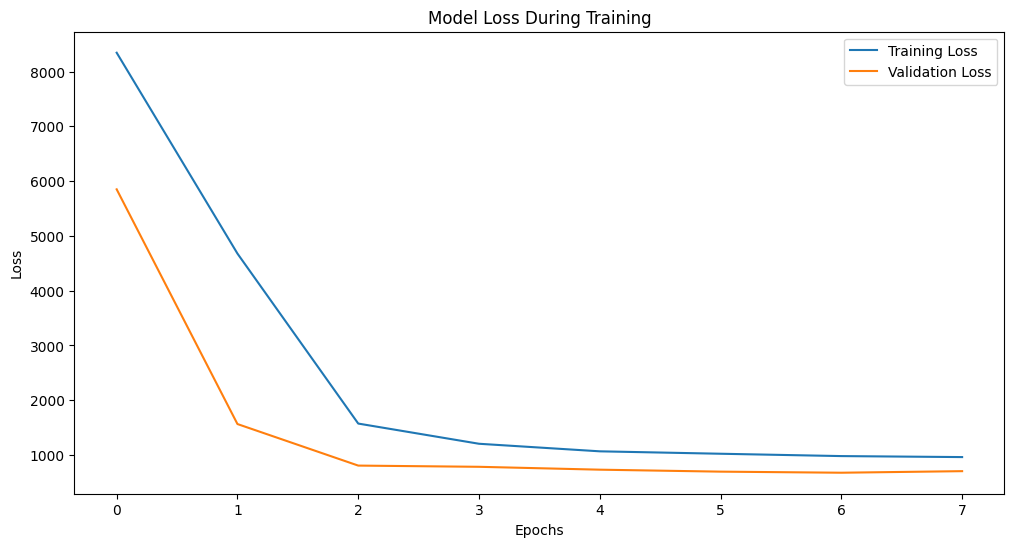

In [414]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Making Predictions and Evaluating the Model

Let's use the model to make predictions on our training and validation sets and evaluate the model's performance using Mean Absolute Percentage Error (MAPE).

In [415]:
import numpy as np

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)
test_predictions = model.predict(test_features)
print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
MAPE on the Training Data: 22.45%
MAPE on the Validation Data: 24.90%


## Visualizing Predictions vs Actual Values

Visualizing the predicted versus actual values can provide insights into the model's accuracy.

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


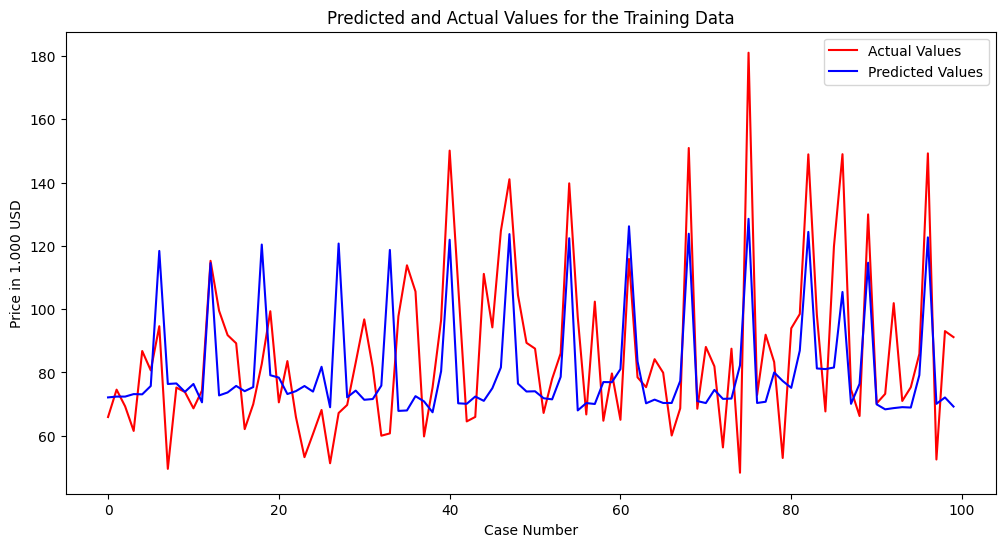

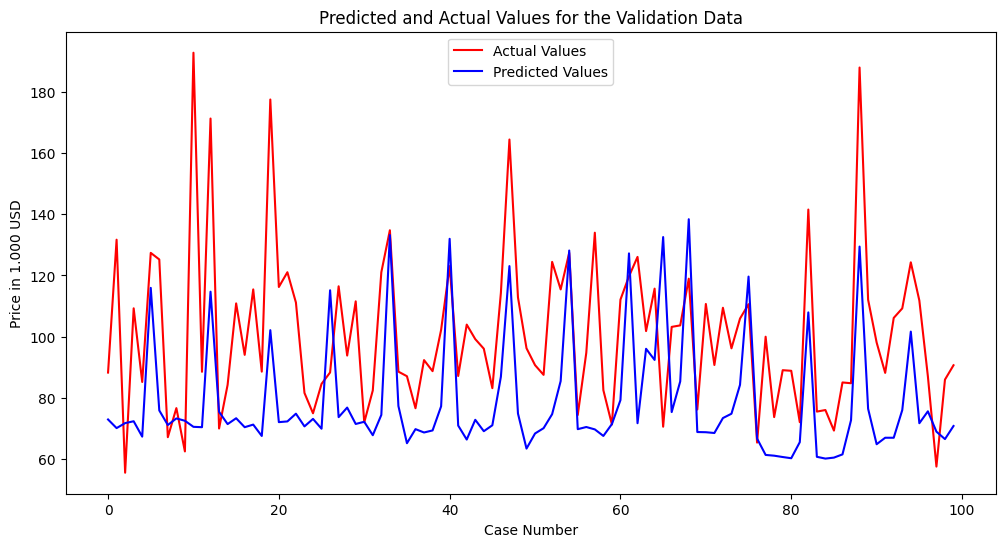

In [416]:
def plot_predictions(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['actual'], label='Actual Values', color='red')
    plt.plot(data['prediction'], label='Predicted Values', color='blue')
    plt.title(title)
    plt.xlabel('Case Number')
    plt.ylabel('Price in 1.000 USD')
    plt.legend()
    plt.show()

# Ensure that training_predictions, validation_predictions, training_labels, and validation_labels are numpy arrays
training_predictions = np.array(training_predictions).flatten()
validation_predictions = np.array(validation_predictions).flatten()
training_labels = np.array(training_labels).flatten()
validation_labels = np.array(validation_labels).flatten()

# print the type of the predictions
print(type(training_predictions))
print(type(validation_predictions))

# Create DataFrames with 1-dimensional arrays
data_train = pd.DataFrame({'prediction': training_predictions, 'actual': training_labels})
data_validation = pd.DataFrame({'prediction': validation_predictions, 'actual': validation_labels})

# Plot predictions
plot_predictions(data_train.head(100), 'Predicted and Actual Values for the Training Data')
plot_predictions(data_validation.head(100), 'Predicted and Actual Values for the Validation Data')

## Export prediction data

In [417]:
#Datum zu predicted Umsatzdaten hinzufügen

# Startdatum von test_data angeben
startdatum = np.datetime64('2018-08-01')

# Erstelle ein Array von Datumsangaben entsprechend der Länge der Umsatzdaten
datum_array = np.arange(startdatum, startdatum + len(test_predictions))

# Konvertiere das Datumsarray zu Strings
datum_array_str = datum_array.astype(str)

# Integriere Datum und Umsatzdaten in ein gemeinsames Array
date_prediction = np.column_stack((datum_array_str, test_predictions))

#print(date_prediction)

# Konvertiere das Array zu einem Pandas DataFrame
df_predictions = pd.DataFrame(date_prediction, columns=["Datum", "Umsatz"])

# Optional: Umsatzdaten zurück zu numerischen Typen konvertieren
df_predictions["Umsatz"] = pd.to_numeric(df_predictions["Umsatz"])


print(df_predictions)

#Mergen der Umsatzdaten mit test_csv

# CSV-Datei mit Warengruppe 1 einlesen
df_test_csv = pd.read_csv("/workspaces/DS_ML_Gr_1.5/0_DataPreparation/test.csv")

# Filtern der Zeilen für Warengruppe 1
warengruppe1_df = df_test_csv[df_test_csv["Warengruppe"] == 4].copy() #Bitte Warengruppenummer ändern!

# Merge der DataFrames mit Left Join auf die Spalte 'Datum'
W_df_merged = pd.merge(warengruppe1_df, df_predictions, on="Datum", how="left")

# Ergebnis als neue CSV-Datei speichern
W_df_merged.to_csv("/workspaces/DS_ML_Gr_1.5/3_Neuronal_Model/Predictions/W4_Konditorei_ID.csv", index=False)

# Ergebnis anzeigen
print(W_df_merged)

          Datum      Umsatz
0    2018-08-01   77.402260
1    2018-08-02   80.885994
2    2018-08-03   81.892700
3    2018-08-04   74.342490
4    2018-08-05  115.555916
..          ...         ...
359  2019-07-26   75.232620
360  2019-07-27   77.521576
361  2019-07-28  113.920910
362  2019-07-29   73.492420
363  2019-07-30   71.041695

[364 rows x 2 columns]
          id       Datum  Warengruppe      Umsatz
0    1808014  2018-08-01            4   77.402260
1    1808024  2018-08-02            4   80.885994
2    1808034  2018-08-03            4   81.892700
3    1808044  2018-08-04            4   74.342490
4    1808054  2018-08-05            4  115.555916
..       ...         ...          ...         ...
349  1907264  2019-07-26            4   75.232620
350  1907274  2019-07-27            4   77.521576
351  1907284  2019-07-28            4  113.920910
352  1907294  2019-07-29            4   73.492420
353  1907304  2019-07-30            4   71.041695

[354 rows x 4 columns]
